In [1]:
# custom python implementation of KMeans

In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
import random

class KMeans(object):
    def __init__(self, k=5, max_iter=100, stopping_criteria='none', data=None, distance_type='squares'):
        self.k = k
        self.max_iter = max_iter
        self.stopping_criteria = stopping_criteria
        self.centroids = []
        self._dunn_index = None
        self._interita = None # min inter cluster dist / max intra cluster
        self.data = []
        self.clusters = []
        
        # index of the points of the centroid
        self.centroids = { k: [] for k in range(self.k) }
        # the max distance between a centroid node and any other nodes
        self.cluster_max_distances = { k : None for k in range(self.k) }
        
        # centroid mean of entire cluster
        self.cluster_means = { k : 0 for k in range(self.k) }
        

        # mean distance of cluster over time
        self.mean_evolution = {
            k : []
            for k in range(self.k)
        }
        # max distance of farthest point in cluster over time
        self.max_distance_evolution = {
            k : []
            for k in range(self.k)
        }
        
        self.roll_max_distance = {
            k : False
            for k in range(self.k)
        }
        
        self.distance_type = distance_type
        
        
    def compute_centroids(self):
        '''
        Need to take 
        '''
        if len(self.data):
            # if we're initializing the centroids do one thing, otherwise, do another
            if not len(self.centroids[list(self.centroids.keys())[0]]):
                for cluster_id, centroid in self.centroids.items():
                    centroid = random.choice(self.data)
                    self.centroids[cluster_id] = centroid
            else:
                # compute new centroids based on old...

                for cluster_id, centroid in self.centroids.items():
                    # get all of the points closest ?
                    #max_dist = self.cluster_max_distances[cluster_id]
                    #if not max_dist:
                    #    continue
                    # if there is no maximum distance for this cluster use another one
                    #if not max_dist:
                        # hard coding for now
                    #    continue
                    
                    # get just the points closest to this centroid and take the mean value
                    cluster_points = []
                    for point in self.data:
                        min_cluster = None
                        min_dist = None
                        for cid2, centroid2 in self.centroids.items():
                            if not min_cluster:
                                min_cluster = cid2
                                min_dist = self.compute_distance(centroid2, point)
                            elif self.compute_distance(centroid2, point) < min_dist:
                                min_cluster = cid2
                                min_dist = self.compute_distance(centroid2, point)
                        if min_cluster == cluster_id:
                            cluster_points.append(point)
                            
                        
                    #cluster_points = list(filter(
                    #    lambda x: self.compute_distance(centroid, x) <= max_dist, self.data))
                    
                    # this is probably not the greatest guiding metric...
                    if not len(cluster_points):
                        continue
                    cluster_mean = sum(map(lambda x: sum(x)/len(x), cluster_points))/len(cluster_points)
                    
                    # take a step toward the cluster mean
                    closest = list(sorted(
                        map(lambda x: (x, sum(x)/len(x)), cluster_points),
                        key=lambda val: (val[1]-cluster_mean)**2
                    ))

                    self.centroids[cluster_id] = closest[-1][0]
                    
                    # reset cluster max distances
                    if not self.roll_max_distance[cluster_id]:
                        self.cluster_max_distances[cluster_id] = None
                    else:
                        continue

        
        
    def compute_distance(self, A, B, type='squares'):
        '''
        A: array or list
        B: array or list
        type : string of distance type to use
        
        '''
        if type == 'squares':
            return sum([ (A[i]-B[i])**2 for i in range(len(A)) ])
        elif type == 'euclidean':
            return math.sqrt(sum([ (A[i]-B[i])**2 for i in range(len(A)) ]))
        elif type == 'cosine':
            num = sum([ (A[i]*B[i]) for i in range(len(A)) ])
            denom = ( math.sqrt(sum([_v**2 for _v in A])) * math.sqrt(sum([_v**2 for _v in B])) )
            return num/denom
        # default to squares
        else:
            return sum([ (A[i]-B[i])**2 for i in range(len(A)) ])
        
        
    def fit(self, data):
        if not len(self.data):
            self.data = data
        
        
        last_total_mean = 0
        for iteration in range(self.max_iter):
            
            self.compute_centroids()
                
            for point in self.data:
                min_dist = None
                closest_cluster = None
                for cluster, centroid in self.centroids.items():
                    distance = self.compute_distance(centroid, point, type=self.distance_type) 
                    if not min_dist:
                        min_dist = distance
                        closest_cluster = cluster
                    else:
                        if distance < min_dist:
                            min_dist = distance
                            closest_cluster = cluster
                self.cluster_means[closest_cluster] += min_dist     

            for cluster, mean in self.cluster_means.items():
                self.mean_evolution[cluster].append(mean)
                # restart it at 0
                self.cluster_means[cluster] = 0

                
            
    def predict(self, point):
        '''
        Predicts the cluster group of a data point
        '''
        min_dist = None
        min_cluster = None
        # the group must have a max distance and a centroid
        for cluster_id, centroid in self.centroids.items():
            #if self.cluster_max_distances[cluster_id]:
            distance = self.compute_distance(point, centroid)
            if not min_dist:
                min_dist = distance
                min_cluster = cluster_id
            elif distance < min_dist:
                min_dist = distance
                min_cluster = cluster_id
        return (min_cluster, min_dist)
        
        
        
        

In [57]:
ones = np.ones((1,10))


In [58]:
sum(ones)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [59]:
km = KMeans()



In [60]:
km

In [61]:
df = pd.read_csv('/Users/wesmadrigal/Downloads/Mall_Customers.csv')

In [62]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
np.ndarray

numpy.ndarray

In [64]:
km = KMeans(k=4)
km.fit(df[['Age', 'Annual_Income_(k$)', 'Spending_Score']].values)

In [65]:
km.centroids

{0: array([ 30, 137,  83]),
 1: array([ 30, 137,  83]),
 2: array([ 38, 113,  91]),
 3: array([20, 16,  6])}

In [66]:
km.predict([19, 15, 39])

(3, 1091)

In [67]:
df['cluster'] = df.apply(lambda row: km.predict([row['Age'], row['Annual_Income_(k$)'], row['Spending_Score']]), axis=1)


In [68]:
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,cluster
0,1,Male,19,15,39,"(3, 1091)"
1,2,Male,21,15,81,"(3, 5627)"
2,3,Female,20,16,6,"(3, 0)"
3,4,Female,23,16,77,"(3, 5050)"
4,5,Female,31,17,40,"(3, 1278)"
...,...,...,...,...,...,...
195,196,Female,35,120,79,"(2, 202)"
196,197,Female,45,126,28,"(0, 3371)"
197,198,Male,32,126,74,"(0, 206)"
198,199,Male,32,137,18,"(0, 4229)"


In [69]:
df['cluster_id'] = df['cluster'].apply(lambda x: x[0])

In [70]:
df.groupby('cluster_id').agg({
    'Age' : ['median', 'mean'],
    'Annual_Income_(k$)' : ['median', 'mean'],
    'Spending_Score' : ['median', 'mean']
})

Age            Annual_Income_(k$)             Spending_Score  \
           median       mean             median        mean         median   
cluster_id                                                                   
0            33.0  37.800000              126.0  124.400000           18.0   
2            35.0  39.126761               77.0   77.859155           71.0   
3            37.5  38.733871               48.0   48.080645           46.0   

                       
                 mean  
cluster_id             
0           28.800000  
2           65.464789  
3           42.322581

Text(0.5, 1.0, 'Custom K-Means with k=3')

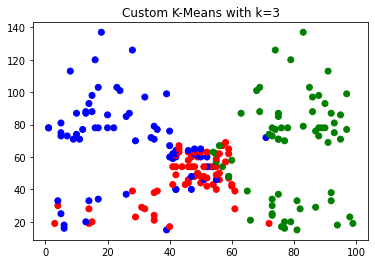

In [46]:
colors = {0:'red', 1:'green', 2:'blue'}#, 3:'black', 4:'orange'}
fig, ax = plt.subplots()
ax.scatter(df['Spending_Score'], df['Annual_Income_(k$)'], c=df['cluster_id'].map(colors))
plt.title("Custom K-Means with k=3")

Text(0.5, 1.0, 'Custom K-Means with k=4')

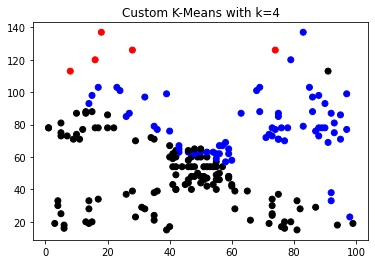

In [71]:
colors = {0:'red', 1:'green', 2:'blue', 3:'black'}#, 4:'orange'}
fig, ax = plt.subplots()
ax.scatter(df['Spending_Score'], df['Annual_Income_(k$)'], c=df['cluster_id'].map(colors))
plt.title("Custom K-Means with k=4")

In [ ]:
# this doesn't look great so let's try more clusters

In [72]:
km.mean_evolution

{0: [43959,
  52908,
  45822,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083,
  19083],
 1: [139696,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0